In [1]:
import pandas as pd
import numpy as np

In [2]:
train_news_df=pd.read_csv('BBC News Train.csv')
test_news_df=pd.read_csv('BBc News Test.csv')

In [3]:
train_news_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
train_news_df.shape

(1490, 3)

There are 1490 rows and 3 columns.

In [5]:
train_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
train_news_df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [7]:
train_news_df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [8]:
train_news_df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [9]:
test_news_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


### Exploratory Data Analysis (EDA)



### Univariate Analysis

In [10]:
# Importing the neccessary libraries 

import seaborn as sns
from matplotlib import pyplot as plt

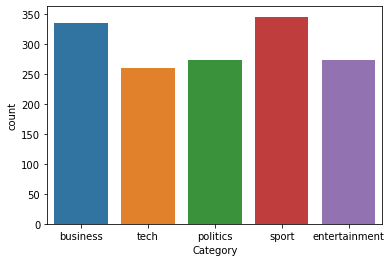

In [11]:
# Plotting the count of each category.

sns.countplot(x='Category',data=train_news_df)
plt.show()

In [13]:
train_news_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [12]:
# Converting the category names into numerical index

train_news_df['Category_id']=train_news_df['Category'].factorize()[0]

In [13]:
train_news_df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [14]:
# Creating new dataframe category containing only category name and categort id.

category=train_news_df[['Category','Category_id']].drop_duplicates().sort_values('Category_id')

In [15]:
category.head()

,Category,Category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

def wordcloud_draw(train_news_df, color = 'white'):
    words = ' '.join(train_news_df)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop,background_color = color,width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


Business related words


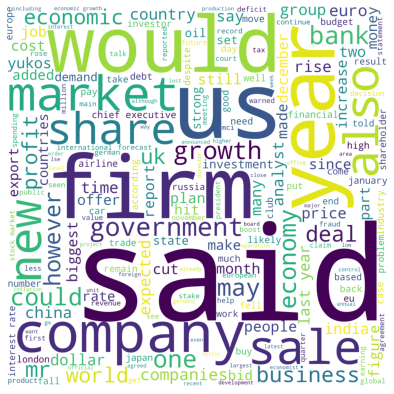

In [17]:
# Creating wordcloud for Business category

business = train_news_df[train_news_df['Category_id'] == 0]
business = business['Text']

print('Business related words')
wordcloud_draw(business,'white')

Technology related words


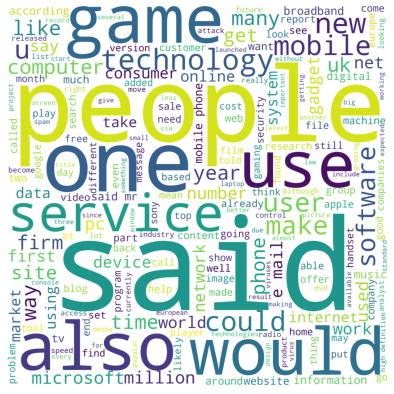

In [18]:
# Creating wordcloud for Technology category

tech = train_news_df[train_news_df['Category_id'] == 1]
tech = tech['Text']

print('Technology related words')
wordcloud_draw(tech,'white')

politics related words


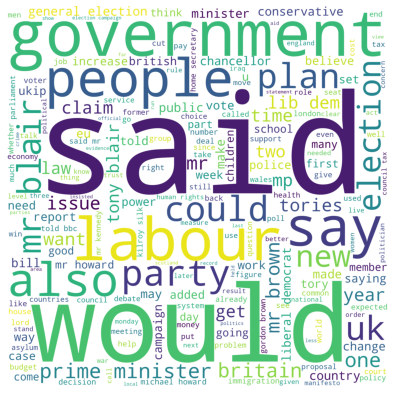

In [19]:
# Creating wordcloud for Politics category

politics = train_news_df[train_news_df['Category_id'] == 2]
politics = politics['Text']

print('politics related words')
wordcloud_draw(politics,'white')

Sports related words


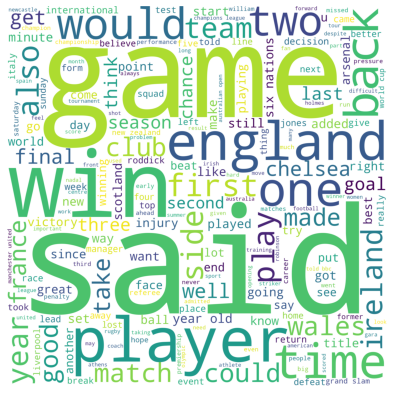

In [20]:
# Creating wordcloud for Sports category

sports = train_news_df[train_news_df['Category_id'] == 3]
sports = sports['Text']

print('Sports related words')
wordcloud_draw(sports,'white')

Entertainment related words


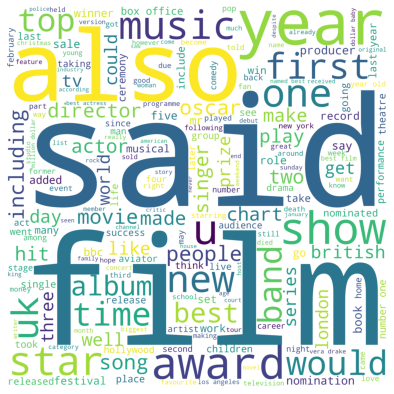

In [23]:
# Creating wordcloud for Entertainment category

entertainment = train_news_df[train_news_df['Category_id'] == 4]
entertainment = entertainment['Text']

print('Entertainment related words')
wordcloud_draw(entertainment,'white')

In [22]:
df=pd.concat([train_news_df,test_news_df],axis=0)
df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0.0
1,154,german business confidence slides german busin...,business,0.0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0.0
3,1976,lifestyle governs mobile choice faster bett...,tech,1.0
4,917,enron bosses in $168m payout eighteen former e...,business,0.0


### Before Preprocessing of data we will merge the train and test dataframe

In [24]:
train_len=len(train_news_df)
print(train_len)

1490


In [25]:
test_len=len(test_news_df)
print(test_len)

735


In [23]:
df=pd.concat([train_news_df,test_news_df],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0.0
1,154,german business confidence slides german busin...,business,0.0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0.0
3,1976,lifestyle governs mobile choice faster bett...,tech,1.0
4,917,enron bosses in $168m payout eighteen former e...,business,0.0


In [26]:
df.tail()

,ArticleId,Text,Category,Category_id
2220,1923,eu to probe alitalia state aid the european ...,NaN,NaN
2221,373,u2 to play at grammy awards show irish rock ba...,NaN,NaN
2222,1704,sport betting rules in spotlight a group of mp...,NaN,NaN
2223,206,alfa romeos to get gm engines fiat is to sto...,NaN,NaN
2224,471,citizenship event for 18s touted citizenship c...,NaN,NaN


## Preprocessing of data

The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are

1. Tokenization
2. Lemmatization
3. Stemming


In [26]:
text=train_news_df['Text']
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [27]:
category=train_news_df['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

## Removal of tags

In [28]:
import re

def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)

train_news_df['Text'] = train_news_df['Text'].apply(remove_tags)
#test_news_df['Text'] = test_news_df['Text'].apply(remove_tags)

## Removal of Special characters

In [29]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

train_news_df['Text']=train_news_df['Text'].apply(special_char)
#test_news_df['Text']=test_news_df['Text'].apply(special_char)

## Removal of stopwords

In [30]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

train_news_df['Text'] = train_news_df['Text'].apply(remove_stopwords)
train_news_df['Text'][1]


['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

In [66]:
#test_news_df['Text']=test_news_df['Text'].apply(remove_stopwords)

## Converting Tect onto lowercase

In [31]:
def lowercasing(text):
    new_lst=[]
    for  i in  text:
        i=i.lower()
        new_lst.append(i) 
    return new_lst

train_news_df['Text']=train_news_df['Text'].apply(lowercasing)

## Lemmetizing the wordsM

In [32]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

train_news_df['Text'] = train_news_df['Text'].apply(lemmatize_word)
train_news_df['Text'][1]
 

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

## After Preprocessing out dataset is like this

In [33]:
train_news_df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0


In [34]:
# Independent and DEpendent variables

x=train_news_df['Text']
y=train_news_df['Category']

In [35]:
x.head()

0    worldcom ex bos launch defence lawyer defendin...
1    german business confidence slide german busine...
2    bbc poll indicates economic gloom citizen majo...
3    lifestyle governs mobile choice faster better ...
4    enron boss 168m payout eighteen former enron d...
Name: Text, dtype: object

In [36]:
y.head()

0    business
1    business
2    business
3        tech
4    business
Name: Category, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(train_news_df.iloc[:,0].values)
y = np.array(train_news_df.Category_id.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(train_news_df.Text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (1490, 5000)
y.shape =  (1490,)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [46]:
perform_list=[]

In [47]:
def run_model(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':

        mdl = LogisticRegression()

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

]))

## Logistic Regression

In [50]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


## Random Forest

In [51]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 97.99
Precision : 0.9798657718120806
Recall : 0.9798657718120806
F1-score : 0.9798657718120806


## Multinomial Navie Bayes

In [52]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


## Support Vector Machine

In [53]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 96.64
Precision : 0.9664429530201343
Recall : 0.9664429530201343
F1-score : 0.9664429530201343


In [54]:
## Decision Tree Classifier

In [55]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 96.64
Precision : 0.9664429530201343
Recall : 0.9664429530201343
F1-score : 0.9664429530201343


## K-Nearest Neighbor

In [56]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.6
Precision : 0.7360178970917226
Recall : 0.7360178970917226
F1-score : 0.7360178970917226


## Gaussian Naive Bayes

In [57]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall : 0.7606263982102909
F1-score : 0.7606263982102909


## Create Dataframe of Model, Accuracy, Precision, Recall, and F1

In [58]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.09,0.97,0.97,0.97
1,Logistic Regression,97.09,0.97,0.97,0.97
2,Random Forest,97.99,0.98,0.98,0.98
3,Multinomial Naive Bayes,97.09,0.97,0.97,0.97
4,Support Vector Classifer,96.64,0.97,0.97,0.97
5,Support Vector Classifer,96.64,0.97,0.97,0.97
6,K Nearest Neighbour,73.60,0.74,0.74,0.74
7,Gaussian Naive Bayes,76.06,0.76,0.76,0.76


## Best Model to Perform Accuracy Score

In [62]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")


The best accuracy of model is 97.99 from Random


## Fit & predict best ML Model

In [63]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [68]:
y_pred

array([4, 2, 3, 2, 3, 0, 0, 1, 4, 0, 3, 4, 2, 1, 3, 1, 0, 4, 1, 4, 1, 1,
       4, 1, 0, 0, 2, 3, 4, 1, 4, 3, 0, 4, 4, 0, 0, 0, 0, 1, 3, 0, 2, 0,
       3, 4, 3, 4, 1, 3, 2, 3, 4, 3, 3, 4, 4, 2, 3, 4, 3, 1, 3, 0, 3, 1,
       0, 1, 0, 4, 3, 3, 4, 1, 1, 2, 2, 2, 4, 1, 0, 1, 4, 4, 4, 3, 1, 0,
       0, 0, 0, 0, 2, 4, 2, 3, 0, 1, 4, 0, 4, 0, 0, 3, 2, 0, 3, 1, 2, 0,
       4, 4, 2, 2, 4, 4, 4, 4, 1, 2, 2, 0, 2, 3, 4, 1, 3, 3, 3, 3, 3, 3,
       0, 2, 3, 3, 3, 1, 3, 2, 0, 3, 2, 0, 4, 0, 1, 4, 2, 1, 3, 3, 3, 2,
       3, 3, 0, 4, 4, 0, 4, 0, 3, 0, 3, 3, 0, 2, 3, 0, 0, 4, 3, 4, 0, 4,
       1, 2, 0, 4, 1, 1, 1, 2, 1, 3, 0, 0, 4, 3, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 3, 1, 3, 1, 2, 3, 0, 3, 4, 0, 1, 4, 0, 0, 1, 0, 2, 1, 4, 3, 2,
       4, 4, 1, 2, 0, 0, 2, 1, 4, 3, 3, 2, 2, 1, 2, 1, 3, 4, 1, 2, 4, 0,
       3, 3, 3, 1, 0, 2, 4, 2, 0, 1, 1, 0, 2, 3, 2, 4, 0, 4, 0, 1, 3, 1,
       3, 0, 0, 0, 1, 2, 2, 2, 0, 3, 2, 3, 2, 4, 4, 1, 0, 1, 2, 4, 4, 3,
       3, 0, 0, 4, 0, 4, 3, 3, 1, 4, 4, 2, 1, 1, 4,

In [72]:
y_pred1 = cv.transform(['software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time.  the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added.'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)


Tech News


In [74]:
t=test_news_df

In [75]:
t.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [76]:
y_pred11=cv.transform(t['Text'])

In [77]:
yy=classifier.predict(y_pred11)

In [79]:
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [99]:
cat = {0 : "business",
                     1 : "tech",
                     2 : "politics",
                     3 : "sports",
                     4 : "entertainment"}


In [103]:
submission=pd.DataFrame()
submission['ArticleId']=t['ArticleId']
submission['Cat']= yy
submission['Category']=submission['cat'].map(cat)
submission.head()

KeyError: 'cat'

In [95]:
cat

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sports', 4: 'entertainment'}

In [96]:
submission["Category"] = submission["Cat"].map(cat)

In [97]:
submission.head()

,ArticleId,Cat,Category
0,1018,3,sports
1,1319,1,tech
2,1138,3,sports
3,459,0,business
4,1020,3,sports


In [104]:
submission=submission.drop(columns=['Cat'])

In [105]:
submission.head()

,ArticleId
0,1018
1,1319
2,1138
3,459
4,1020
